In [1]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [2]:
# import csv file
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')
# to avoid encoding errors ,use 'unicode_escape'

In [3]:
df.shape

#row=11251 column =15

(11251, 15)

In [4]:
df.head()

#show top 5 row 

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
# Find the customer who spent the maximum amount and their spending amount
max_spender_row = df.loc[df['Amount'].idxmax()]
max_spender_name = max_spender_row['Cust_name']
max_spending_amount = max_spender_row['Amount']

# Find the customer who spent the minimum amount and their spending amount
min_spender_row = df.loc[df['Amount'].idxmin()]
min_spender_name = min_spender_row['Cust_name']
min_spending_amount = min_spender_row['Amount']

print("Customer who spent the maximum amount:", max_spender_name, "with spending amount:", max_spending_amount)
print("Customer who spent the minimum amount:", min_spender_name, "with spending amount:", min_spending_amount)


Customer who spent the maximum amount: Sanskriti with spending amount: 23952.0
Customer who spent the minimum amount: Brumley with spending amount: 188.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
# Grouping data by 'Gender' and 'Age Group', and calculating the average amount spent
average_amount_by_gender_age = df.groupby(['Gender', 'Age Group'])['Amount'].mean()

# Print the average amount spent for each combination of 'Gender' and 'Age Group'
print("Average Amount Spent by Gender and Age Group:")
print(average_amount_by_gender_age)


Average Amount Spent by Gender and Age Group:
Gender  Age Group
F       0-17          8897.586420
        18-25         9108.814559
        26-35         9471.996005
        36-45         9828.870399
        46-50         9730.725830
        51-55         9738.169982
        55+           8841.658088
M       0-17          9389.880597
        18-25         9327.054007
        26-35         9158.403302
        36-45         9411.401418
        46-50         8498.106897
        51-55        10383.642599
        55+          10813.264516
Name: Amount, dtype: float64


In [8]:
# Find the customer who spent the maximum amount and the maximum amount spent
max_amount_index = df['Amount'].idxmax()
max_spender = df.loc[max_amount_index, 'Cust_name']
max_amount = df.loc[max_amount_index, 'Amount']

print("Customer who spent the maximum amount:", max_spender)
print("Maximum amount spent:", max_amount)


Customer who spent the maximum amount: Sanskriti
Maximum amount spent: 23952.0


In [9]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

#axis =1 = row

In [10]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [11]:
# drop null values
df.dropna(inplace=True)

In [12]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [13]:
# Grouping by customer name and calculating total amount spent
top_spending_customers = df.groupby('Cust_name')['Amount'].sum().sort_values(ascending=False)

# Selecting the top 10 spending customers
top_10_customers = top_spending_customers.head(10)

# Iterating over the top 10 spending customers
for customer in top_10_customers.index:
    # Filtering the data for the current customer
    customer_data = df[df['Cust_name'] == customer]
    
    # Calculating the total amount spent by the customer
    total_spent = customer_data['Amount'].sum()
    
    # Extracting the unique product names purchased by the customer
    purchased_products = customer_data['Product_Category'].unique()
    
    # Printing the customer name, total amount spent, and the products purchased
    print(f"Customer: {customer}, Total Amount Spent: Rs.{total_spent:,.2f}")
    print("Products Purchased:")
    for product in purchased_products:
        print(product)
    print("------------")



Customer: Vishakha, Total Amount Spent: Rs.382,782.00
Products Purchased:
Furniture
Food
Footwear & Shoes
Sports Products
Games & Toys
Electronics & Gadgets
Clothing & Apparel
Decor
Beauty
Household items
Pet Care
------------
Customer: Sudevi, Total Amount Spent: Rs.287,142.00
Products Purchased:
Auto
Food
Footwear & Shoes
Stationery
Sports Products
Games & Toys
Clothing & Apparel
Electronics & Gadgets
Beauty
Household items
Veterinary
------------
Customer: Vasudev, Total Amount Spent: Rs.281,034.00
Products Purchased:
Auto
Food
Footwear & Shoes
Hand & Power Tools
Electronics & Gadgets
Clothing & Apparel
Sports Products
Household items
------------
Customer: Neola, Total Amount Spent: Rs.275,234.00
Products Purchased:
Auto
Footwear & Shoes
Tupperware
Furniture
Food
Electronics & Gadgets
Games & Toys
Clothing & Apparel
Sports Products
Books
Pet Care
Veterinary
Office
------------
Customer: Alejandro, Total Amount Spent: Rs.272,517.00
Products Purchased:
Footwear & Shoes
Food
Auto
Spor

In [14]:
df['Amount'].dtypes

dtype('int32')

In [15]:
#rename column
df.rename(columns= {'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [16]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe() 

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [17]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender

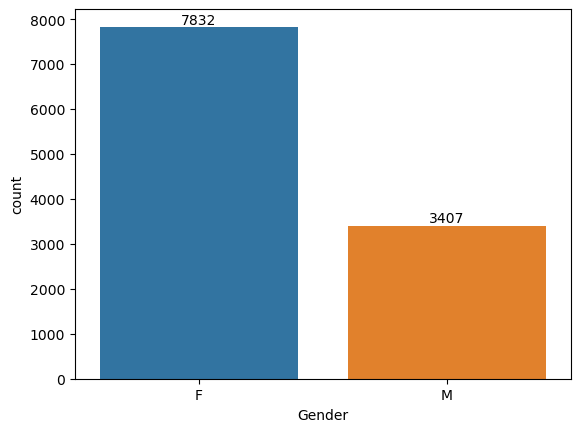

In [18]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

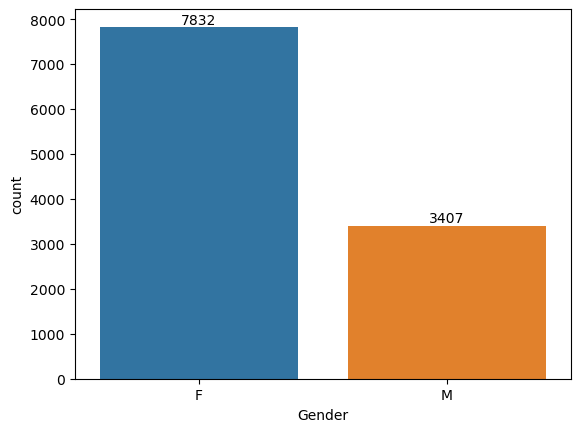

In [19]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [20]:
df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


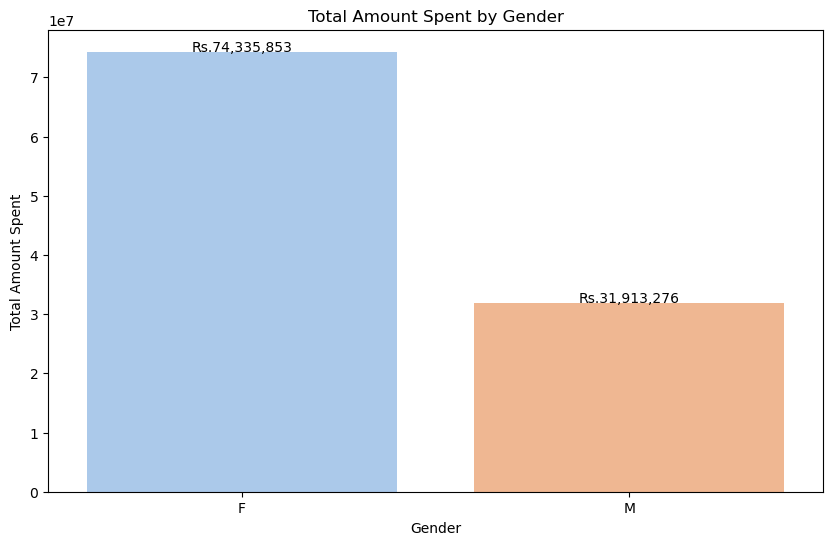

In [21]:
# Grouping by Gender and calculating total amount spent
gender_total_amount = df.groupby('Gender')['Amount'].sum().reset_index()

# Creating the plot
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_total_amount, x='Gender', y='Amount', palette='pastel')

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Total Amount Spent')
plt.title('Total Amount Spent by Gender')

# Adding value labels on the bars
for index, row in gender_total_amount.iterrows():
    plt.text(index, row['Amount'], f"Rs.{row['Amount']:,}", color='black', ha="center")

# Show plot
plt.show()


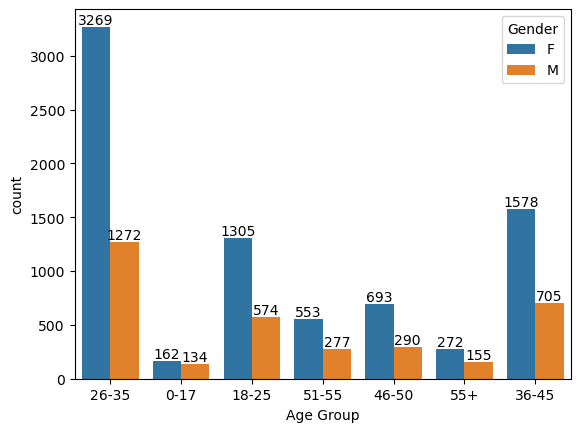

In [22]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### Age

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

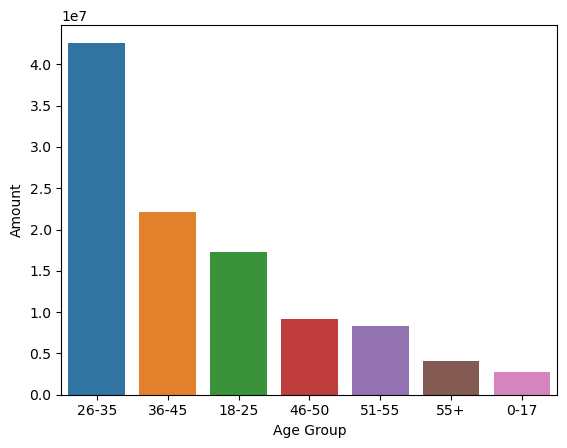

In [23]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

In [24]:
# Grouping by Age Group and Gender and calculating total amount spent
sales_gender_age = df.groupby(['Age Group', 'Gender'], as_index=False)['Amount'].sum()

# Displaying total amount spent for each age group, separately for females and males
for age_group in sales_age['Age Group'].unique():
    female_amount = sales_gender_age[(sales_gender_age['Gender'] == 'F') & (sales_gender_age['Age Group'] == age_group)]['Amount'].values
    male_amount = sales_gender_age[(sales_gender_age['Gender'] == 'M') & (sales_gender_age['Age Group'] == age_group)]['Amount'].values
    print(f"Age Group: {age_group}, Female Total Amount Spent: Rs.{female_amount[0]:,.0f}, Male Total Amount Spent: Rs.{male_amount[0]:,.0f}")


Age Group: 26-35, Female Total Amount Spent: Rs.30,963,953, Male Total Amount Spent: Rs.11,649,489
Age Group: 36-45, Female Total Amount Spent: Rs.15,509,956, Male Total Amount Spent: Rs.6,635,038
Age Group: 18-25, Female Total Amount Spent: Rs.11,887,003, Male Total Amount Spent: Rs.5,353,729
Age Group: 46-50, Female Total Amount Spent: Rs.6,743,393, Male Total Amount Spent: Rs.2,464,451
Age Group: 51-55, Female Total Amount Spent: Rs.5,385,208, Male Total Amount Spent: Rs.2,876,269
Age Group: 55+, Female Total Amount Spent: Rs.2,404,931, Male Total Amount Spent: Rs.1,676,056
Age Group: 0-17, Female Total Amount Spent: Rs.1,441,409, Male Total Amount Spent: Rs.1,258,244


### State

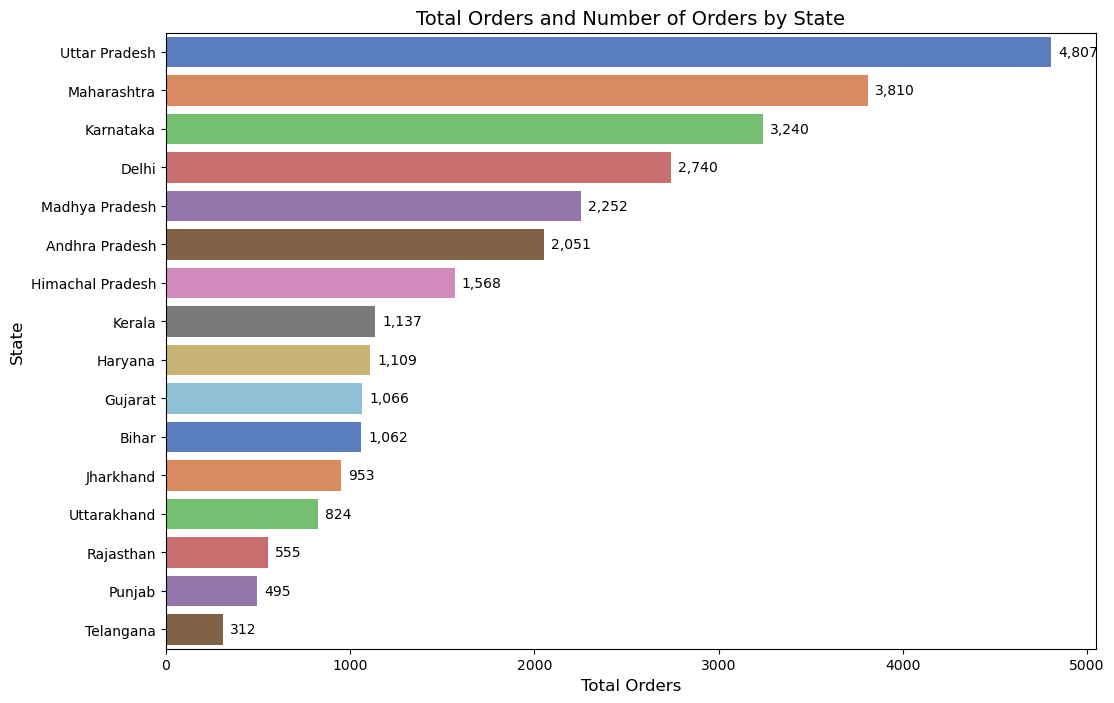

In [25]:
# Grouping by State and calculating total number of orders
orders_by_state = df.groupby('State')['Orders'].sum().reset_index()

# Sorting the data by total orders
orders_by_state_sorted = orders_by_state.sort_values(by='Orders', ascending=False)

# Creating the plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Orders', y='State', data=orders_by_state_sorted, palette='muted')

# Adding annotations to display number of orders per state
for i, p in enumerate(ax.patches):
    ax.annotate(f'{int(p.get_width()):,}', (p.get_width(), p.get_y() + p.get_height() / 2), xytext=(5, 0),
                textcoords='offset points', va='center')

# Adding labels and title
plt.xlabel('Total Orders', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.title('Total Orders and Number of Orders by State', fontsize=14)

# Displaying the plot
plt.show()

<AxesSubplot:xlabel='State', ylabel='Amount'>

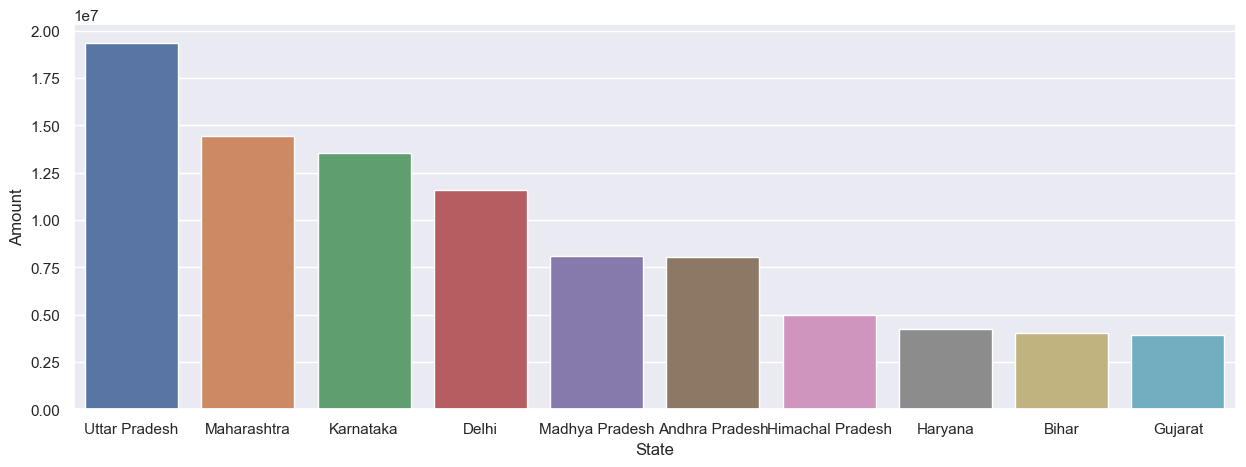

In [29]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

In [3]:
# Grouping by State and calculating total amount spent
total_spend_by_state = df.groupby('State')['Amount'].sum().reset_index()

# Displaying total spend amount for each state
print(total_spend_by_state)


               State       Amount
0     Andhra Pradesh   8037146.99
1              Bihar   4022757.00
2              Delhi  11603819.45
3            Gujarat   3946082.00
4            Haryana   4220175.00
5   Himachal Pradesh   4963368.00
6          Jharkhand   3026456.00
7          Karnataka  13523540.00
8             Kerala   3894491.99
9     Madhya Pradesh   8101142.00
10       Maharashtra  14427543.00
11            Punjab   1525800.00
12         Rajasthan   1909409.00
13         Telangana   1151490.00
14     Uttar Pradesh  19374968.00
15       Uttarakhand   2520944.00


*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


In [4]:
# Grouping by State and calculating total amount spent
total_spend_by_state = df.groupby('State')['Amount'].sum().reset_index()

# Displaying total spend amount for each state
print(total_spend_by_state)

               State       Amount
0     Andhra Pradesh   8037146.99
1              Bihar   4022757.00
2              Delhi  11603819.45
3            Gujarat   3946082.00
4            Haryana   4220175.00
5   Himachal Pradesh   4963368.00
6          Jharkhand   3026456.00
7          Karnataka  13523540.00
8             Kerala   3894491.99
9     Madhya Pradesh   8101142.00
10       Maharashtra  14427543.00
11            Punjab   1525800.00
12         Rajasthan   1909409.00
13         Telangana   1151490.00
14     Uttar Pradesh  19374968.00
15       Uttarakhand   2520944.00


### Marital Status

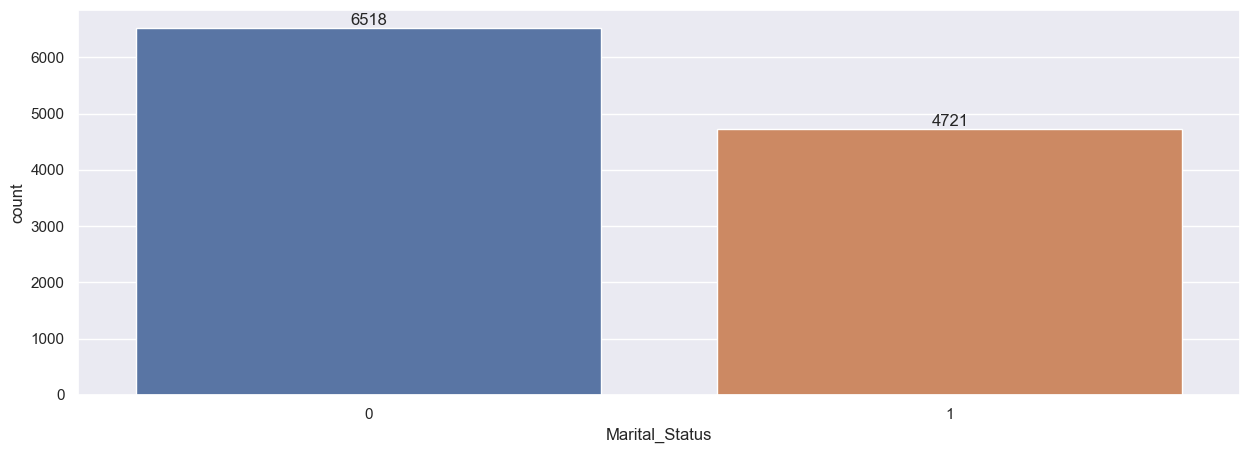

In [21]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

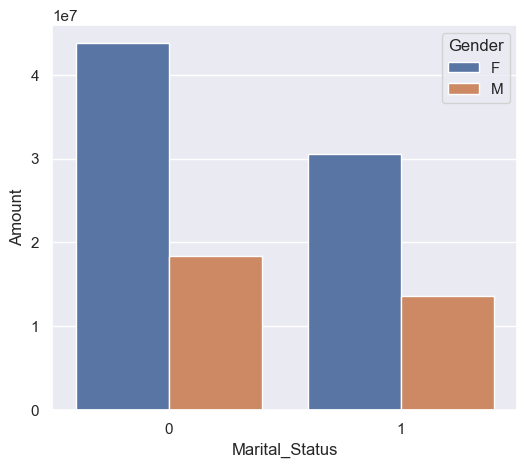

In [22]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

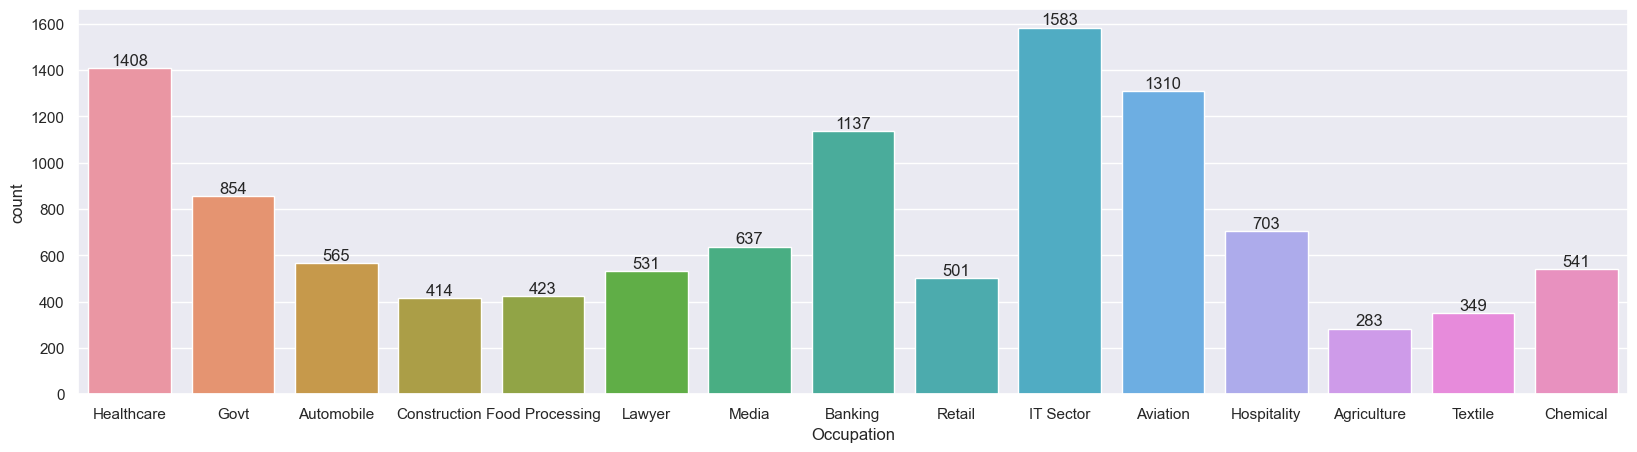

In [23]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

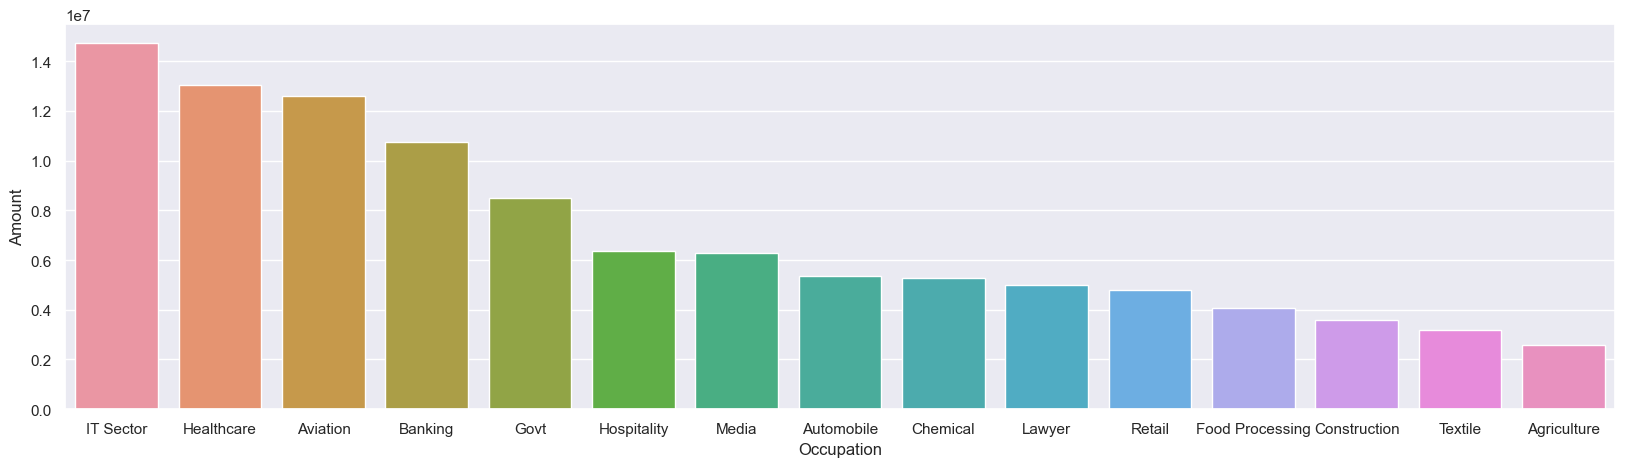

In [24]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

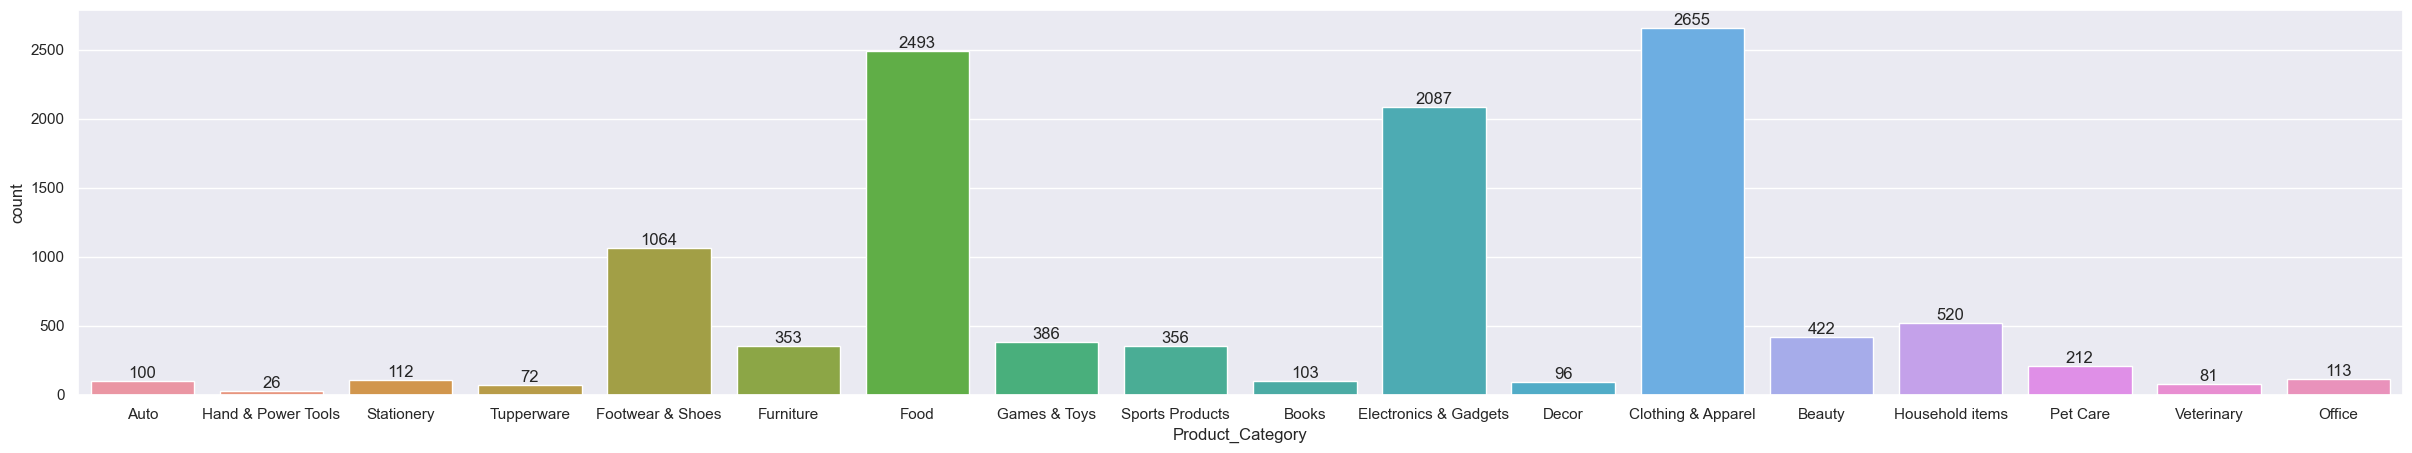

In [8]:
sns.set(rc={'figure.figsize':(30,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

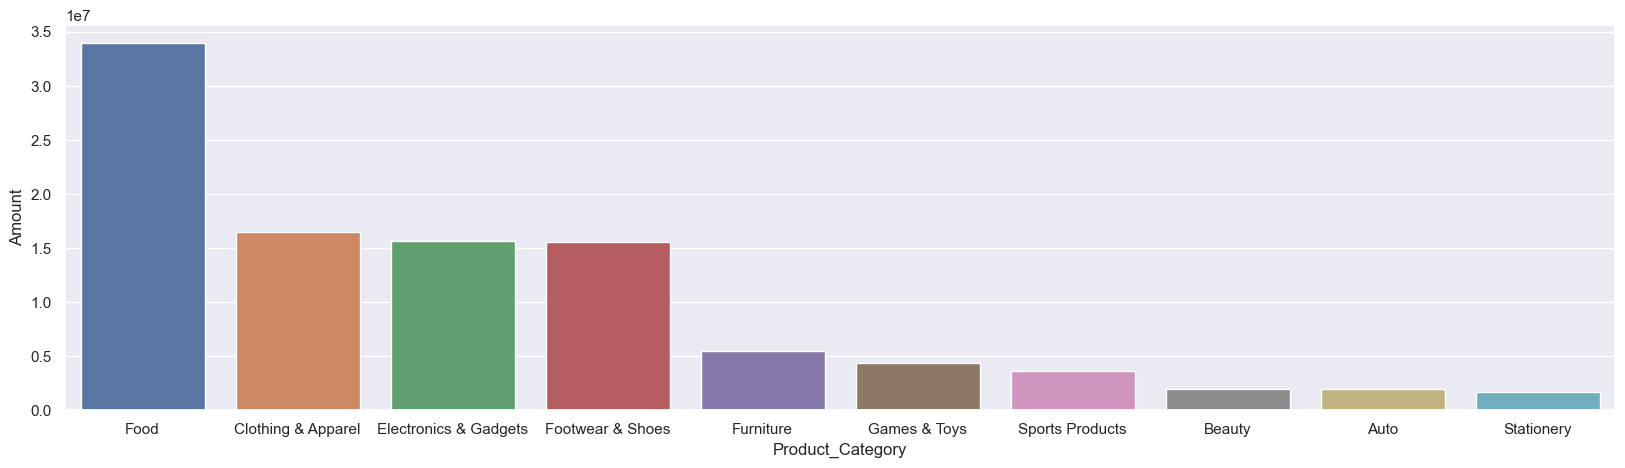

In [26]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

<Axes: xlabel='Product_ID', ylabel='Orders'>

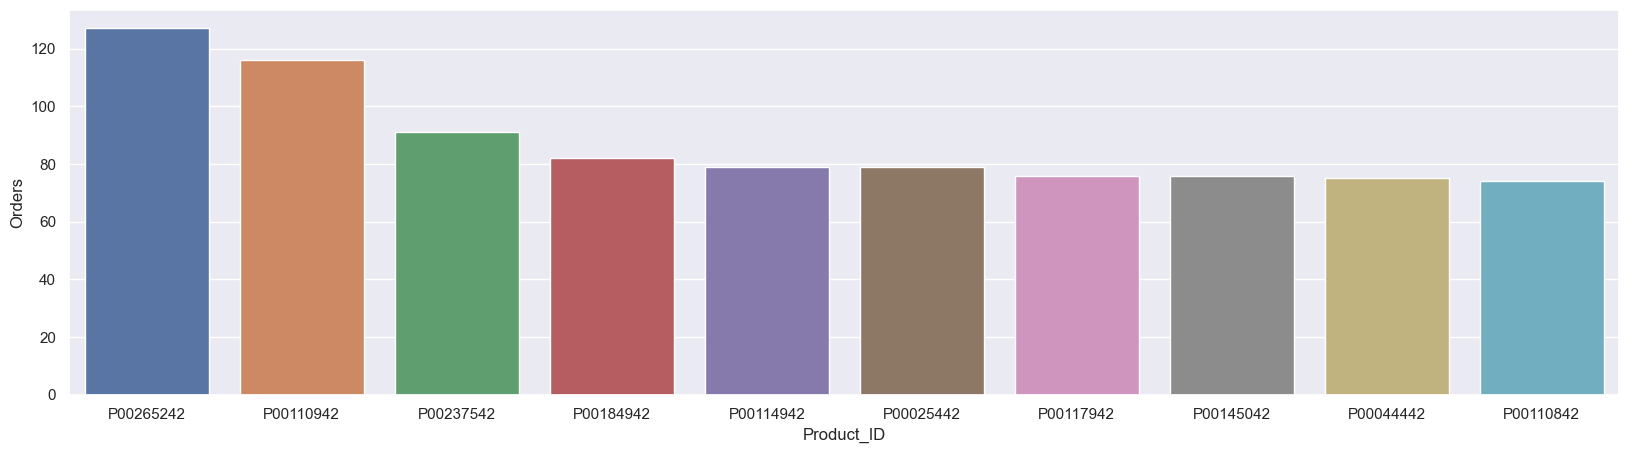

In [27]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

<AxesSubplot:xlabel='Product_ID'>

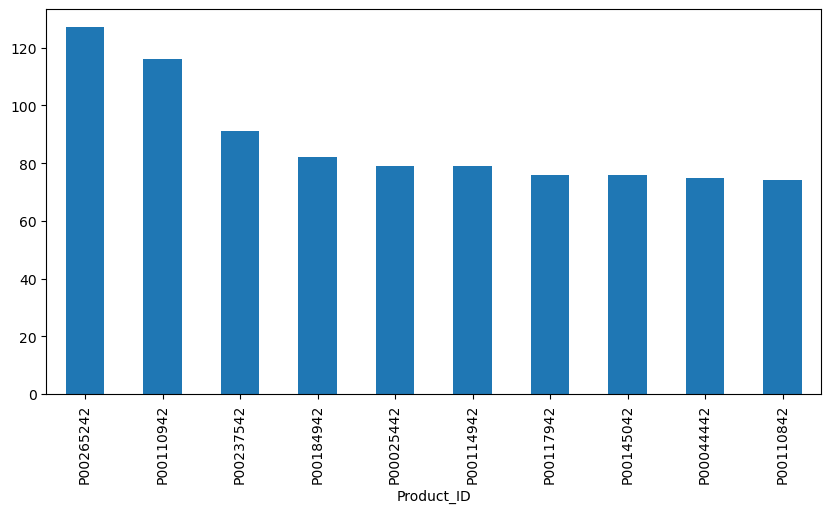

In [5]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(10,5))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

# Zone

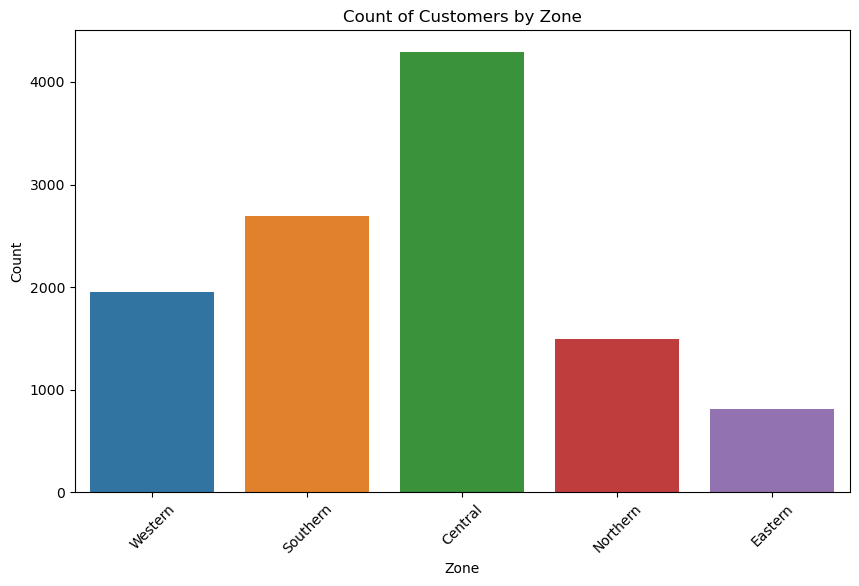

In [19]:
# Plotting a bar chart for the 'Zone' column
plt.figure(figsize=(10, 6))
sns.countplot(x='Zone', data=df)
plt.title('Count of Customers by Zone')
plt.xlabel('Zone')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


Thank you!